In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

In [2]:
df = pd.read_csv('fake_low_systolic.csv', sep=',')
Y = df['score']
X = df.drop('score', axis=1)

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf_clf = RandomForestRegressor(n_estimators=10, random_state=10)

kfold_validacion = KFold(10)

# MSE scores
mse_scores = cross_val_score(rf_clf, X, Y, cv=kfold_validacion, scoring='neg_mean_squared_error')
print("MSE scores:", mse_scores)
rf_mse = mse_scores.mean()

# MAE scores
mae_scores = cross_val_score(rf_clf, X, Y, cv=kfold_validacion, scoring='neg_mean_absolute_error')
print("MAE scores:", mae_scores)
rf_mae = mae_scores.mean()

# RMSE from MSE scores
rmse_scores = np.sqrt(np.abs(mse_scores))
print("RMSE scores:", rmse_scores)
rf_rmse = rmse_scores.mean()

# R2 scores
r2_scores = cross_val_score(rf_clf, X, Y, cv=kfold_validacion, scoring='r2')
print("R-squared scores:", r2_scores)
rf_r2 = r2_scores.mean()

MSE scores: [ -0.8566381   -0.39235742  -2.10058862 -18.36589228  -0.96333332
  -1.97499924  -0.29183048  -0.54071617  -1.45445066  -7.33849005]
MAE scores: [-0.166038 -0.127026 -0.213201 -0.294814 -0.174906 -0.180153 -0.113971
 -0.133744 -0.171913 -0.322516]
RMSE scores: [0.92554746 0.6263844  1.44934075 4.28554457 0.98149545 1.40534666
 0.54021336 0.73533405 1.20600608 2.70896476]
R-squared scores: [0.94852803 0.93616211 0.84968876 0.62034635 0.91240619 0.84367255
 0.93629339 0.94688652 0.90335262 0.79463712]


In [4]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

nn = KNeighborsRegressor(n_neighbors=5)

kfold_validacion = KFold(10)

# MSE scores
mse_scores = cross_val_score(nn, X, Y, cv=kfold_validacion, scoring='neg_mean_squared_error')
print("MSE scores:", mse_scores)
nn_mse = mse_scores.mean()

# MAE scores
mae_scores = cross_val_score(nn, X, Y, cv=kfold_validacion, scoring='neg_mean_absolute_error')
print("MAE scores:", mae_scores)
nn_mae = mae_scores.mean()

# RMSE from MSE scores
rmse_scores = np.sqrt(np.abs(mse_scores))
print("RMSE scores:", rmse_scores)
nn_rmse = rmse_scores.mean()

# R2 scores
r2_scores = cross_val_score(nn, X, Y, cv=kfold_validacion, scoring='r2')
print("R-squared scores:", r2_scores)
nn_r2 = r2_scores.mean()

MSE scores: [-16.64927007  -6.2770359  -14.69873328 -45.5854396  -12.94116835
  -9.71902252  -6.32094158 -12.02443956 -15.86874224 -35.00231201]
MAE scores: [-1.322952 -1.18566  -1.257702 -1.56633  -1.452342 -1.29909  -1.148612
 -1.36578  -1.405946 -1.589978]
RMSE scores: [4.08035171 2.50540135 3.83389271 6.75169902 3.59738354 3.11753469
 2.51414828 3.46762737 3.98355899 5.91627518]
R-squared scores: [-0.00038833 -0.0212951  -0.05179319  0.05767286 -0.17671232  0.23070854
 -0.37986195 -0.18113701 -0.05446848  0.02048304]


In [5]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

neural = MLPRegressor()
kfold_validacion = KFold(10)

# MSE scores
mse_scores = cross_val_score(neural, X, Y, cv=kfold_validacion, scoring='neg_mean_squared_error')
print("MSE scores:", mse_scores)
neural_mse = mse_scores.mean()

# MAE scores
mae_scores = cross_val_score(neural, X, Y, cv=kfold_validacion, scoring='neg_mean_absolute_error')
print("MAE scores:", mae_scores)
neural_mae = mae_scores.mean()

# RMSE from MSE scores
rmse_scores = np.sqrt(np.abs(mse_scores))
print("RMSE scores:", rmse_scores)
neural_rmse = rmse_scores.mean()

# R2 scores
r2_scores = cross_val_score(neural, X, Y, cv=kfold_validacion, scoring='r2')
print("R-squared scores:", r2_scores)
neural_r2 = r2_scores.mean()

MSE scores: [-13.08156717  -4.8854886  -11.04839559 -44.78747427 -18.38292153
 -11.81250288 -17.95967206  -7.63260108 -18.93133766 -30.85087237]
MAE scores: [-1.44691863 -1.32490104 -1.30506862 -1.98034825 -1.28216302 -1.50056512
 -0.95756286 -1.38139692 -1.1733544  -1.39459316]
RMSE scores: [3.61684492 2.21031414 3.32391269 6.69234445 4.28753094 3.43693219
 4.23788533 2.76271625 4.3510157  5.55435616]
R-squared scores: [ 0.04842663 -2.61381609  0.11486643  0.07305658  0.18749161  0.06992614
 -1.27995339 -0.62428776  0.05297101  0.08138094]


In [6]:
mse = [rf_mse, nn_mse, neural_mse]
mae = [rf_mae, nn_mae, neural_mae]
rmse = [rf_rmse, nn_rmse, neural_rmse]
r2 = [rf_r2, nn_r2, neural_r2]
print(mse)
print(mae)
print(rmse)
print(r2)

[-3.427929635400001, -17.5087105104, -17.93728332031434]
[-0.1898282, -1.3594392000000002, -1.3746872021481562]
[1.4864177557348763, 3.9767872824911508, 4.047385277660948]
[0.8691973634145006, -0.05567919389758229, -0.38899378905196025]


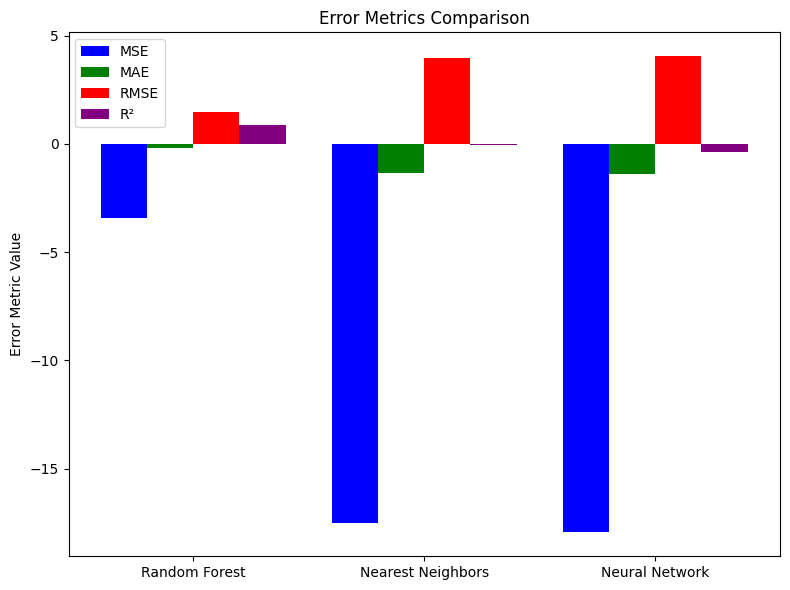

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))  # Ajustar el tamaño si lo deseas

# Posiciones en X para las barras (controlar la ubicación)
x = [0, 1, 2]  # Hay 3 modelos

bar_width = 0.2
ax.bar(x, mse, label='MSE', width=bar_width, color='b')
ax.bar([i + bar_width for i in x], mae, label='MAE', width=bar_width, color='g')
ax.bar([i + bar_width * 2 for i in x], rmse, label='RMSE', width=bar_width, color='r')
ax.bar([i + bar_width * 3 for i in x], r2, label='R²', width=bar_width, color='purple')

# Set labels and title
ax.set_ylabel('Error Metric Value')
ax.set_title('Error Metrics Comparison')

# Set x-axis tick labels (customize based on your model names)
ax.set_xticks([i + bar_width * 1.5 for i in x])
ax.set_xticklabels(['Random Forest', 'Nearest Neighbors', 'Neural Network'])

# Add legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
